# Define the Weddell Sea MPA from the documentation available on the CCAMLR website

The MPA in the Weddell Sea is proposed but has not been adopter by CCAMLR Members yet. Proposed sptail definission is already available on the CCMALR website : https://meetings.ccamlr.org/en/ccamlr-38/23
This document is from 2019, and it is the information used by the MPAtlas, so we used the same. 
However, these are not the ultimate coordinantes of the MPA when/if adopted. 

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon

Cannot find header.dxf (GDAL_DATA is not defined)


In [2]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/data_envir/MPA')

In [3]:
# Coordonnées
coordinates = [
    (0, -72.25),
    (-20, -72.25),
    (-20, -69),
    (-18.75, -69),
    (-18.75, -72),
    (-17.5, -72),
    (-17.5, -71.25),
    (-15, -71.25),
    (-15, -70.25),
    (-12, -70.25),
    (-12, -69.5),
    (-6.25, -69.5),
    (-6.25, -69),
    (-4.75, -69),
    (-4.75, -69.75),
    (-2, -69.75),
    (-2, -69),
    (0, -69)
]


polygon = Polygon(coordinates)
df1 = gpd.GeoDataFrame(index=[2], geometry=[polygon], crs="EPSG:4326")
df1['Name'] = 'Weddell_sea_Fisheries_Research_Zone'
df1
# Reprojeter à l'EPSG voulu
#geometry = geometry.to_crs(epsg=3031)

#geometry.to_file("Fisheries_Research_Zone.shp")

,geometry,Name
2,"POLYGON ((0.00000 -72.25000, -20.00000 -72.250...",Weddell_sea_Fisheries_Research_Zone


<Axes: >

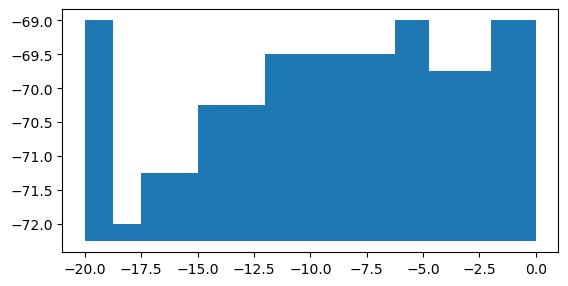

In [4]:
df1.geometry.plot()

In [5]:
gpz_coordinates = [
    (0, -69),
    (-2, -69),
    (-2, -69.75),
    (-4.75, -69.75),
    (-4.75, -69),
    (-6.25, -69),
    (-6.25, -69.5),
    (-12, -69.5),
    (-12, -70.25),
    (-15, -70.25),
    (-15, -71.25),
    (-17.5, -71.25),
    (-17.5, -72),
    (-18.75, -72),
    (-18.75, -72.25),
    (-20, -72.25),
    (-20, -75),
    (-46, -77.8), # Berkner island point
    (-60, -75),
    (-60, -64),
    (-39, -64),
    (-39, -67),
    (-43, -67),
    (-43, -65),
    (-50, -65),
    (-50, -71.5),
    (-20, -71.5),
    (-20, -68.75),
    (-7, -68.75),
    (-7, -65),
    (-1, -65),
    (-1, -64),
    (0, -64)
]

gpz_polygon = Polygon(gpz_coordinates)
df2 = gpd.GeoDataFrame(index=[1], geometry=[gpz_polygon], crs="EPSG:4326")
df2['Name'] = 'Weddell_sea_General_Protection_Zone'
df2
#gpz_geometry = gpz_geometry.to_crs(epsg=3031)

#gpz_geometry.to_file("Weddell_sea_General_Protection_Zone.shp")

,geometry,Name
1,"POLYGON ((0.00000 -69.00000, -2.00000 -69.0000...",Weddell_sea_General_Protection_Zone


<Axes: >

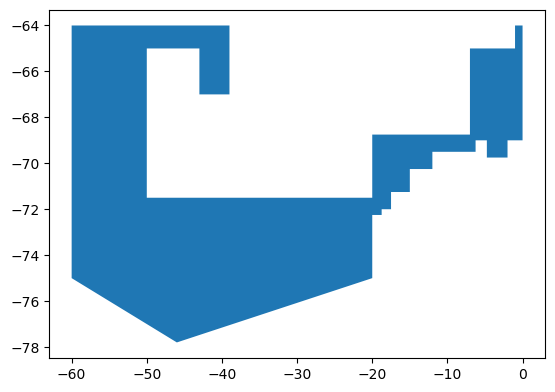

In [6]:
df2.geometry.plot()

In [7]:
df = pd.concat([df2, df1])
df["row_id"] = df.index + 1
df.reset_index(drop=True, inplace=True)
df.set_index("row_id", inplace = True)

df

,geometry,Name
row_id,,
2,"POLYGON ((0.00000 -69.00000, -2.00000 -69.0000...",Weddell_sea_General_Protection_Zone
3,"POLYGON ((0.00000 -72.25000, -20.00000 -72.250...",Weddell_sea_Fisheries_Research_Zone


In [8]:
#save inshape file
df.to_file('Weddell_sea_MPA.shp')       